Folder 'layers/' has been emptied.


CNOT(0,2)
T(0)
CNOT(3,0)
CNOT(2,0)
CNOT(2,1)
HAD(1)
CNOT(0,3)
CNOT(1,3)
CNOT(1,0)
T(2)
[<JCZCircuit.JGate object at 0x17eaa2950>, <JCZCircuit.CZGate object at 0x17ebb2c50>, <JCZCircuit.JGate object at 0x17eefedd0>, <JCZCircuit.JGate object at 0x17eaa2790>, <JCZCircuit.JGate object at 0x17f00f410>, <JCZCircuit.JGate object at 0x17eca7a10>, <JCZCircuit.CZGate object at 0x17ed1f2d0>, <JCZCircuit.JGate object at 0x17f00df90>, <JCZCircuit.JGate object at 0x17f00f4d0>, <JCZCircuit.CZGate object at 0x17f00f5d0>, <JCZCircuit.JGate object at 0x17f00ded0>, <JCZCircuit.JGate object at 0x17f00de90>, <JCZCircuit.CZGate object at 0x17f00df50>, <JCZCircuit.JGate object at 0x17f00e150>, <JCZCircuit.JGate object at 0x17f00e110>, <JCZCircuit.JGate object at 0x17f00e050>, <JCZCircuit.CZGate object at 0x17f00df10>, <JCZCircuit.JGate object at 0x17f00e310>, <JCZCircuit.JGate object at 0x17f00e090>, <JCZCircuit.CZGate object at 0x17f00e1d0>, <JCZCircuit.JGate object at 0x17f00e390>, <JCZCircuit.JGate object

-------------- 
Below is the JCZ pyZX in graph form


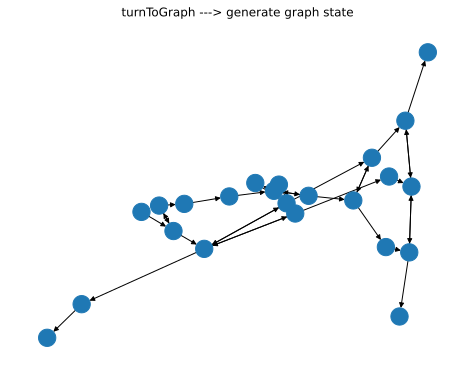

2.Node index: 1, Node attribute {'node_val': 'In', 'pos': (0, -2), 'phase': 0, 'gate_name': 'CNOT'}
2.Node index: 2, Node attribute {'node_val': 'Aux', 'pos': (3, -2), 'phase': 0, 'gate_name': 'CNOT'}
2.Node index: 3, Node attribute {'node_val': 'In', 'pos': (6, 0), 'phase': 1, 'gate_name': 'CNOT'}
2.Node index: 4, Node attribute {'node_val': 'Aux', 'pos': (9, -2), 'phase': 1, 'gate_name': 'CNOT'}
2.Node index: 5, Node attribute {'node_val': 'Aux', 'pos': (12, 0), 'phase': 0, 'gate_name': 'T'}
2.Node index: 6, Node attribute {'node_val': 'Aux', 'pos': (15, 0), 'phase': 0, 'gate_name': 'T'}
2.Node index: 7, Node attribute {'node_val': 'Aux', 'pos': (18, 0), 'phase': 0, 'gate_name': 'CNOT'}
2.Node index: 8, Node attribute {'node_val': 'In', 'pos': (21, -3), 'phase': 0, 'gate_name': 'CNOT'}
2.Node index: 9, Node attribute {'node_val': 'Aux', 'pos': (24, 0), 'phase': 0, 'gate_name': 'CNOT'}
2.Node index: 10, Node attribute {'node_val': 'Aux', 'pos': (27, 0), 'phase': 0, 'gate_name': 'CNOT'

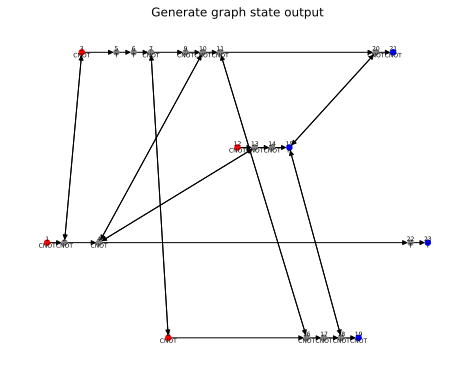

shift signal finished
The depth [3, 3, 3, 3], Max degree, 4, Max length 5
Processing 2 degree nodes: [3, 5, 6, 8, 9, 14, 17, 22]
Current progress of Head nodes [5, 3]
Current progress of Head nodes [6, 5, 3]
The path to be mapped, [6, 5, 3]
The neighbours of the, 6, head node [5, 7]
The neighbours of the, 3, tail node [2, 5]
Head connectivity 1 , (AtlasView({6: {'con_qubits': {6: 2, 7: 1}}, 8: {'con_qubits': {7: 2, 8: 1}}, 9: {'con_qubits': {7: 3, 9: 1}}}), AtlasView({5: {'con_qubits': {5: 2, 6: 1}}, 7: {'con_qubits': {6: 2, 7: 1}}}))
Tail connectivity 2, {'con_qubits': {2: 2, 3: 1}}
The path: [6, 5, 3]
Depths: [3, 3, 3, 3], Head connectivity: 1 
Head depths: 1
{0: [0]}
dict_keys([0])
[] [1]
************************* 
Above was during 1 while loop
Processing 2 degree nodes: [8, 9, 14, 17, 22]
The path to be mapped, [8]
The neighbours of the, 8, head node [7, 16]
The neighbours of the, 8, tail node [7, 16]
Head connectivity 2 , (AtlasView({8: {'con_qubits': {7: 2, 8: 1}}, 9: {'con_qubit

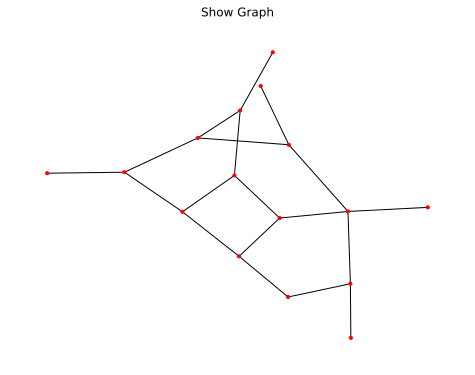

TypeError: compact_graph_dynamic_general() missing 1 required positional argument: 'NxM'

In [1]:
from Fusion import *
from Graph_State import *
from Compact_Graph_Dynamic import *
from Compact_Graph_Dynamic_List import *
from Compact_Graph_Dynamic_General import *
from Compact_Graph import *
from Validate import *
from Construct_Test_Circuit import *
from Determine_Dependency import *
from Partition import *
from Add_Round import *
from Z_Measure_Notify import *
from Generate_State import *

import sys
import os

NQubit = 4
Depth = 10
MaxDegree = 16
StarStructure = False
DynamicSchedule = True
SpecialFusion = True
GeneralState = True

def to_undirected(gs):
    undirected_graph = nx.Graph()
    for nnode in gs.nodes():
        undirected_graph.add_node(nnode)
        if StarStructure or MaxDegree <= 4:
            undirected_graph.nodes[nnode]['phase'] = gs.nodes[nnode]['phase']
        else:
            if not GeneralState:
                undirected_graph.nodes[nnode]['phase'] = []
                undirected_graph.nodes[nnode]['phase'].append(gs.nodes[nnode]['phase'])
            else:
                undirected_graph.nodes[nnode]['phase'] = {}
                undirected_graph.nodes[nnode]['phase'][0] = []
                undirected_graph.nodes[nnode]['phase'][0].append(gs.nodes[nnode]['phase'])                
        # if not Generalized_Flow_Flag:
        if not DynamicSchedule:
            undirected_graph.nodes[nnode]['layer'] = gs.nodes[nnode]['layer']

    for edge in gs.edges():
        if edge not in undirected_graph.edges():
            undirected_graph.add_edge(edge[0], edge[1])
            undirected_graph[edge[0]][edge[1]]['con_qubits'] = {}
        if GeneralState:
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[0]] = 1
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[1]] = 1    
            # print("general state")
        else:
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[0]] = 0
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[1]] = 0                       
    return undirected_graph

def empty_folder(folder_path):
    if os.path.exists(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):
                os.remove(item_path)
            elif os.path.isdir(item_path):
                empty_folder(item_path)
        print(f"Folder '{folder_path}' has been emptied.")
    else:
        print(f"Folder '{folder_path}' does not exist.")

def main():
    empty_folder("layers/")
    # construct circuit
    gates_list, qubits = generate_circuit(NQubit, Depth)
    # gates_list, qubits = construct_qaoa(NQubit, 0.5)

    # generate graph state
    gs, input_nodes, colors = generate_graph_state(gates_list, qubits)
    
    if DynamicSchedule:
        # causal flow
        dgraph = determine_dependency(gs)
        # gs = schedule(gs, dgraph)
        # gs = partition(gs, input_nodes)
        # pos = nx.get_node_attributes(gs, 'pos')
        undirected_graph = to_undirected(gs)

        # # generalized flow
        # if Generalized_Flow_Flag:
        #     undirected_graph = generalized_flow(undirected_graph, input_nodes)
        #     labels = {node: str(undirected_graph.nodes[node]['layer']) for node in undirected_graph.nodes()}
        #     nx.draw(undirected_graph, pos = pos, labels = labels, node_size = 30, font_size = 10)


        # fusion
        if GeneralState:
            resource_state = generate_state(MaxDegree)
            fgraph = fusion_dynamic_general(undirected_graph, resource_state.copy())
            while fgraph == -1:
                resource_state = generate_state(MaxDegree)
                fgraph = fusion_dynamic_general(undirected_graph, resource_state.copy())                
        else:
            fgraph, added_nodes = fusion_graph_dynamic(undirected_graph, MaxDegree, StarStructure, SpecialFusion)
        
        # add rounds
        # fgraph = add_round(fgraph, 1)
        
        # map and route
        if GeneralState:
            net_list = compact_graph_dynamic_general(fgraph, dgraph.copy(), resource_state)
        elif StarStructure or MaxDegree <= 4:
            net_list = compact_graph_dynamic(fgraph, dgraph, MaxDegree)
        else:
            # if SpecialFusion:
            #     net_list = compact_graph_dynamic_list_special_fusion(fgraph, dgraph, MaxDegree)
            # else:
            net_list = compact_graph_dynamic_list(fgraph, dgraph, MaxDegree, SpecialFusion)
    else:
        gs = partition(gs, input_nodes)
        undirected_graph = to_undirected(gs)
        fgraph, added_nodes = fusion_graph(undirected_graph, MaxDegree, StarStructure)
        fgraph = add_round(fgraph, 1)
        net_list = compact_graph(fgraph, MaxDegree)
    
    if not GeneralState and not StarStructure:
        net_list = z_measure_notify(net_list, MaxDegree)
    # show result
    fusions = 0
    for net in net_list:
        fusions += len(list(net.edges()))
    print("fusion:", fusions)
    
    if GeneralState:
        validate_con_qubits_list(net_list, MaxDegree) 
    elif StarStructure or MaxDegree <= 4:
        validate_con_qubits(net_list, MaxDegree)
        fgraph = validate(net_list, fgraph, MaxDegree) 
    else:
        validate_con_qubits_list(net_list, MaxDegree)  
    return

if __name__ == '__main__':
    main()